In [91]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Problem 2
$p(x)=c_0+c_1x+c_2x^2+c_3x^3$

In [92]:
#x=x coord
x=np.array([-4,-2,1,2])
#p=y coord
p=np.array([-21,5,-16,-15])
#Construct X array by powers of the x variable
X=np.empty([4, 4])
for i in range(0,4):
    for j in range(0,4):
        X[i,j]=x[i]**j
print(X)
#Solve directly for the coefficients c
c=np.linalg.solve(X,p)
print(c)

[[  1.  -4.  16. -64.]
 [  1.  -2.   4.  -8.]
 [  1.   1.   1.   1.]
 [  1.   2.   4.   8.]]
[-9. -9.  1.  1.]


$p(x)=-9-9x+x^2+x^3$

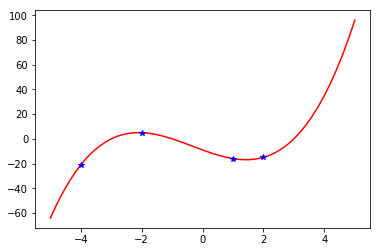

In [93]:
x=np.linspace(-5,5)
dots=np.array([-4,-2,1,2])
y=-9-9*x+x**2+x**3
plt.plot(x,y,'r',dots,p,'b*');
plt.savefig('2.png')

# Problem 3

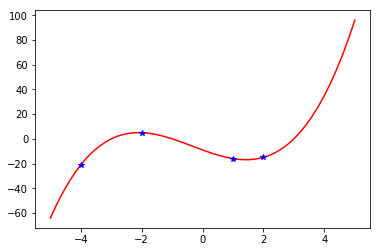

In [94]:
def l(x):
    return -21*(-(x+2)*(x-1)*(x-2)/60)+5*((x+4)*(x-1)*(x-2)/24)+16*((x+4)*(x+2)*(x-2)/15)-15*((x+4)*(x+2)*(x-1)/24)
y=l(x)
plt.plot(x,y,'r',dots,p,'b*');
plt.savefig('3.png')

In [95]:
def f(x):
    return np.cos(2*x)/np.exp(x)
trueInt=(1-np.exp(-2*np.pi))/5

In [96]:
f(np.pi)

0.04321391826377225

('Trapezoidal Approximation =', 0.19985851507101846)
('Trapezoidal Error =', 0.00023200361736006037)


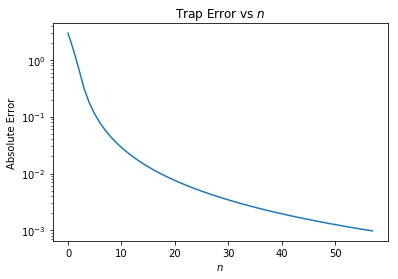

In [97]:
#Trapezoidal
x=np.linspace(0,2*np.pi,120)
n=len(x)
h=(x[-1]-x[0])/(n-1)
I=0
for i in range(1,n):
    I+=h*(f(x[i])+f(x[i-1]))/2
print("Trapezoidal Approximation =", I)
errTrap=np.abs(trueInt-I)
print("Trapezoidal Error =", errTrap)

Terr=np.empty([58])
for n in range(2,60):
    x=np.linspace(0,2*np.pi,n)
    h=(x[-1]-x[0])/(n-1)
    I=0
    for i in range(1,n):
        I+=h*(f(x[i])+f(x[i-1]))/2
    Terr[n-2]=np.abs(trueInt-I)
#print(Terr)
plt.semilogy(Terr,);
plt.title("Trap Error vs $n$");
plt.xlabel("$n$");
plt.ylabel("Absolute Error");

('Simpsons Approximation =', 0.19969123848305897)
('Simpsons Error =', 6.472702940057973e-05)


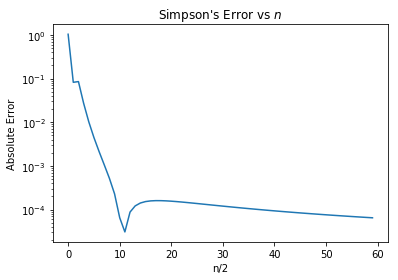

In [98]:
#Simpsons
x=np.linspace(0,2*np.pi,121)
n=len(x)
h=(x[-1]-x[0])/(n-1)
I=0
I+=h*(f(x[0])+f(x[-1]))/3
for i in range(1,n):
    if(i%2==1):
        I+=4*h*f(x[i])/3
    else:
        I+=2*h*f(x[i])/3
print("Simpsons Approximation =", I)
errSimp=np.abs(trueInt-I)
print("Simpsons Error =", errSimp)

Serr=np.empty([60])
for n in range(3,123,2):
    x=np.linspace(0,2*np.pi,n)
    h=(x[-1]-x[0])/(n-1)
    I=0
    I+=h*(f(x[0])+f(x[-1]))/3
    for i in range(1,n):
        if(i%2==1):
            I+=4*h*f(x[i])/3
        else:
            I+=2*h*f(x[i])/3
    Serr[int((n-1)/2-1)]=np.abs(trueInt-I)
#print(Serr)
plt.semilogy(Serr,);
plt.title("Simpson's Error vs $n$");
plt.xlabel("n/2");
plt.ylabel("Absolute Error");

('Gaussian Approximation =', 0.19952545176164557)
('Gaussian Error =', 0.00010105969201282261)


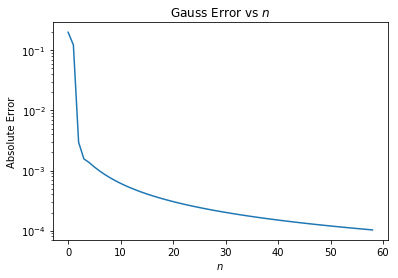

In [111]:
#Gaussian 3 Point
x=np.linspace(0,2*np.pi,120)
n=len(x)
#print(x)
h=(x[-1]-x[0])/(n-1)
I=0
for i in range(1,int(n/2)):
    I+=(float(5.0/9.0))*f(x[2*i-1]-h*np.sqrt(0.6))+(float(8.0/9.0))*f(x[2*i-1])+(float(5.0/9.0))*f(x[2*i-1]+h*np.sqrt(0.6))
I=h*I
print("Gaussian Approximation =",I)
errGauss=np.abs(trueInt-I)
print("Gaussian Error =", errGauss)

Gerr=np.empty([59])
for n in range(2,120,2):
    x=np.linspace(0,2*np.pi,n)
    h=float((x[-1]-x[0])/(n-1))
    I=0
    for i in range(1,int(n/2)):
        I+=(float(5.0/9.0))*f(x[2*i-1]-h*np.sqrt(0.6))+(float(8.0/9.0))*f(x[2*i-1])+(float(5.0/9.0))*f(x[2*i-1]+h*np.sqrt(0.6))
    I=h*I
    Gerr[int(n/2)-1]=np.abs(trueInt-I)
#print(Gerr)
plt.semilogy(Gerr,);
plt.title("Gauss Error vs $n$");
plt.xlabel("$n$");
plt.ylabel("Absolute Error");

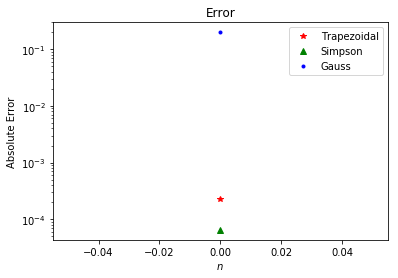

In [100]:
plt.semilogy(errTrap, 'r*', errSimp, 'g^', errGauss, 'b.');
plt.legend(["Trapezoidal", "Simpson", "Gauss"])
plt.title("Error");
plt.xlabel("$n$");
plt.ylabel("Absolute Error");
plt.savefig('7err.png')

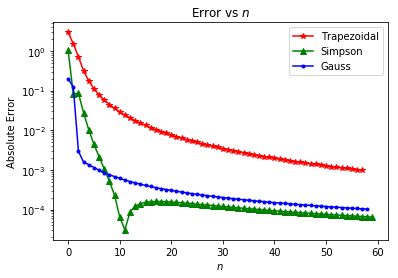

In [101]:
plt.semilogy(Terr, 'r*-', Serr, 'g^-', Gerr, 'b.-');
plt.legend(["Trapezoidal", "Simpson", "Gauss"])
plt.title("Error vs $n$");
plt.xlabel("$n$");
plt.ylabel("Absolute Error");
plt.savefig('7allerr.png')

# Problem 10

In [102]:
def myErf(x):
    return np.exp(-(x**2))
nodes=2**np.arange(1,11)
math.erf(1)

0.842700792949715

[7.09574607e-02 7.71547032e-03 1.41288980e-03 3.07532579e-04
 7.19947789e-05 1.74313842e-05 4.28946158e-06 1.06396953e-06
 2.64952232e-07 6.61086174e-08]


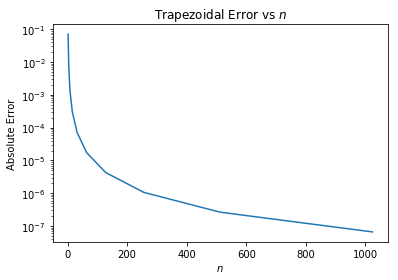

In [103]:
#Trapezoidal Rule
Terr=np.empty([10])
for n in range(1,11):
    x=np.linspace(0,1,nodes[n-1])
    h=(x[-1]-x[0])/(nodes[n-1]-1)
    I=0
    for i in range(1,nodes[n-1]):
        I+=h*(myErf(x[i])+myErf(x[i-1]))/2
    I=2*I/np.sqrt(np.pi)
    Terr[int(n-1)]=np.abs(math.erf(1)-I)
print(Terr)
plt.semilogy(nodes,Terr);
plt.title("Trapezoidal Error vs $n$");
plt.xlabel("$n$");
plt.ylabel("Absolute Error");
plt.savefig('10trap.png')

[3.28205238e-01 6.16621239e-02 2.25966242e-02 9.83985823e-03
 4.60752102e-03 2.23119932e-03 1.09809995e-03 5.44752121e-04
 2.71311051e-04 1.35390444e-04]


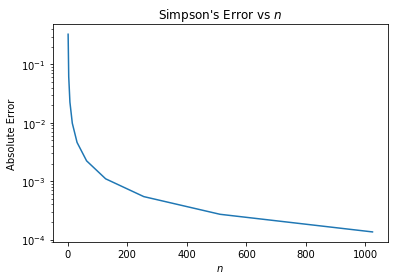

In [104]:
#Simpsons Rule
Serr=np.empty([10])
for n in range(1,11):
    x=np.linspace(0,1,nodes[n-1])
    h=(x[-1]-x[0])/(nodes[n-1]-1)
    I=0
    I+=h*(myErf(x[0])+myErf(x[-1]))/3
    if(nodes[n-1] != 2):
        for i in range(1,nodes[n-1]-1):
            if(i%2==1):
                I+=4*h*myErf(x[i])/3
            else:
                I+=2*h*myErf(x[i])/3
    I=2*I/np.sqrt(np.pi)
    Serr[n-1]=np.abs(math.erf(1)-I)
print(Serr)
plt.semilogy(nodes,Serr);
plt.title("Simpson's Error vs $n$");
plt.xlabel("$n$");
plt.ylabel("Absolute Error");
plt.savefig('10simp.png')

In [105]:
#Gaussian
def gaussFunc(x):
    return np.exp(-(((x+1)/2)**2))
T=0.5

In [106]:
gaussFunc(1)

0.36787944117144233

[2.58900427e-04 3.78366485e-07 7.32747196e-15 0.00000000e+00
 1.11022302e-16 0.00000000e+00 5.55111512e-16 2.22044605e-16
 3.33066907e-16 1.66533454e-15]


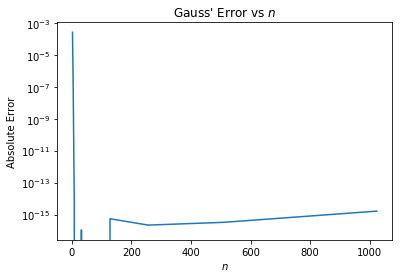

In [107]:
Gerr=np.empty([10])
for n in range(1,11):
    [x,w]=np.polynomial.legendre.leggauss(nodes[n-1])

    w=T*w
    #print(w)
    I=0
    for i in range(0,nodes[n-1]):
        #print(w[i]*gaussFunc(x[i]))
        I=I+float(w[i]*gaussFunc(x[i]))
    I=2*I/np.sqrt(np.pi)
    #print(I)
    Gerr[n-1]=np.abs(math.erf(1)-I)
print(Gerr)
plt.semilogy(nodes,Gerr);
plt.title("Gauss' Error vs $n$");
plt.xlabel("$n$");
plt.ylabel("Absolute Error");
plt.savefig('10gauss.png')

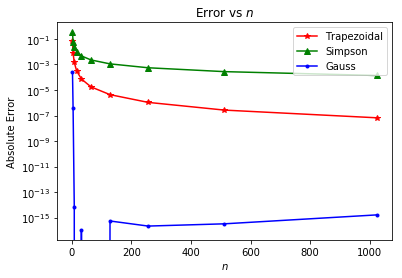

In [108]:
plt.semilogy(nodes, Terr, 'r*-', nodes, Serr, 'g^-', nodes, Gerr, 'b.-');
plt.legend(["Trapezoidal", "Simpson", "Gauss"])
plt.title("Error vs $n$");
plt.xlabel("$n$");
plt.ylabel("Absolute Error");
plt.savefig('10allerr.png')